# Social Media Analytics

Media sosial adalah teknologi interaktif yang memungkinkan pengguna untuk berbagi informasi, ide, dan ekspresi bentuk lainnya melalui komunitas dan jaringan virtual. Dengan adanya media sosial data menjadi semakin banyak. Akan tetapi jika data tersebut tidak digunakan maka hanya akan menjadi sampah. Data dari media sosial sangatlah berguna bagi beberapa aspek, contohnya adalah untuk sentimen analisis. Contohnya, pada kasus ini ingin mengetahui sentimen analisis dari pengguna twitter mengenai maskapai penerbangan. Nantinya sentimen analisis ini akan berguna bagi sebuah perusahaan untuk dapat mengetahui kekurangan dari pelayanan mereka dan meningkatkan kualitas kerja mereka.

## Import Module

In [1]:
import pandas as pd 
import numpy as np

#Authentication module for documentation
import tweepy as tp

#import nltk module 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

# SECTION A : Data Preparation

## A.1 Load Tweet Data

In [4]:
df = pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


## A.2 Drop duplicate tweet

In [4]:
#dropo duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

# Section B : Data Preprocessing

## B.1. Basic Text Pre-processing 

### 1. Lower casing
Akan membuat tweet menjadi huruf kecil semua

In [10]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0                     @united you have a culture issue
1    @americanair @usairways - i'm pregnant with tw...
2    @southwestair thank you. the email about rr pt...
3                  @united on flight 1220 right now...
4    @southwestair if i am a rapid awards member, d...
Name: text, dtype: object

### 2. Punctuation removal
Akan menghilangkan simbol/karakter pada tweet

In [11]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,united you have a culture issue
1,americanair usairways im pregnant with twins ...
2,southwestair thank you the email about rr pts ...
3,united on flight 1220 right now
4,southwestair if i am a rapid awards member doe...


### 3. Stopwords removal
Untuk menghilangkan stopwords yang ada pada tweet

In [12]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0                                 united culture issue
1    americanair usairways im pregnant twins youre ...
2    southwestair thank email rr pts amp gain wasnt...
3                             united flight 1220 right
4    southwestair rapid awards member points apply ...
5    jetblue fleets fleek httptcopa7dcjxlzl cmon fa...
6    americanair moved us onto 655pm availability 1...
7    southwestair sitting baltimore finish taxi app...
8               jetblue love youll never work day life
9    americanair fortunately window seat noshow abl...
Name: text, dtype: object

### 4. Frequent words removal

In [13]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

united          4125
flight          3823
usairways       3036
americanair     2791
southwestair    2440
jetblue         2349
get             1326
cancelled       1034
thanks          1030
service          948
dtype: int64

In [14]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0                                        culture issue
1    im pregnant twins youre going abandon overnigh...
2    thank email rr pts amp gain wasnt clear mine r...
3                                           1220 right
4    rapid awards member points apply taken round trip
Name: text, dtype: object

### 5. Rare words removal

In [16]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

wellpriced          1
sector              1
acarl4hotmailcom    1
trite               1
salvaged            1
apples              1
kiosksbag           1
1002                1
suspended           1
coin                1
dtype: int64

In [17]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0                                        culture issue
1    im pregnant twins youre going abandon overnigh...
2    thank email rr pts amp gain wasnt clear mine r...
3                                           1220 right
4    rapid awards member points apply taken round trip
Name: text, dtype: object

### 6. Spelling correction

In [18]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                        culture issue
1    in pregnant twins your going abandon overnight...
2    thank email or its amp gain want clear mine r ...
3                                           1220 right
4    rapid awards member points apply taken round trip
Name: text, dtype: object

### 7. Tokenization

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\putrib064183\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
TextBlob(dataframe['text'][1]).words

WordList(['im', 'pregnant', 'twins', 'youre', 'going', 'abandon', 'overnight', 'airport', 'hotel', 'fault'])

### 8. Stemming

In [22]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [23]:
dataframe.head()

,text
0,cultur issu
1,im pregnant twin your go abandon overnight air...
2,thank email rr pt amp gain wasnt clear mine r ...
3,1220 right
4,rapid award member point appli taken round trip


### 9. Lematization

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\putrib064183\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [26]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0                                          cultur issu
1    im pregnant twin your go abandon overnight air...
2    thank email rr pt amp gain wasnt clear mine r ...
3                                           1220 right
4      rapid award member point appli taken round trip
Name: text, dtype: object

In [27]:
dataframe.head()

,text
0,cultur issu
1,im pregnant twin your go abandon overnight air...
2,thank email rr pt amp gain wasnt clear mine r ...
3,1220 right
4,rapid award member point appli taken round trip


# SECTION C : Data Exploration

##  C.1. Basic feature extraction 

### 1. Number of words

In [28]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,cultur issu,2
1,im pregnant twin your go abandon overnight air...,10
2,thank email rr pt amp gain wasnt clear mine r ...,14
3,1220 right,2
4,rapid award member point appli taken round trip,8


### 2. Number of characters

In [29]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,cultur issu,2,11
1,im pregnant twin your go abandon overnight air...,10,62
2,thank email rr pt amp gain wasnt clear mine r ...,14,66
3,1220 right,2,10
4,rapid award member point appli taken round trip,8,47


### 3. Number of stopwords

In [30]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,cultur issu,2,11,0
1,im pregnant twin your go abandon overnight air...,10,62,1
2,thank email rr pt amp gain wasnt clear mine r ...,14,66,0
3,1220 right,2,10,0
4,rapid award member point appli taken round trip,8,47,0


### 3. Number of special characters

In [31]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,cultur issu,2,11,0,0
1,im pregnant twin your go abandon overnight air...,10,62,1,0
2,thank email rr pt amp gain wasnt clear mine r ...,14,66,0,0
3,1220 right,2,10,0,0
4,rapid award member point appli taken round trip,8,47,0,0


In [32]:
dataframe

,text,word_count,char_count,stopwords,hastags
0,cultur issu,2,11,0,0
1,im pregnant twin your go abandon overnight air...,10,62,1,0
2,thank email rr pt amp gain wasnt clear mine r ...,14,66,0,0
3,1220 right,2,10,0,0
4,rapid award member point appli taken round trip,8,47,0,0
...,...,...,...,...,...
14422,incur u approxim 2000 dollar fee due staff mem...,11,66,0,0
14423,unfortun true robot apolog hang help,6,36,0,0
14424,call say yall busi call back late flightr terr...,10,56,0,0
14425,text say delay due air traffic control b pull ...,12,60,0,0


### 4. Visualization 

Pada pie chart dibawah ini dapat terlihat bawah sentiment negative lebih banyak dibandingkan sentiment lainnya. Hal ini seharusnya dapat menjadi sebuah "warning" bagi airlines untuk meningkatkan kualitas mereka.

<function matplotlib.pyplot.show>

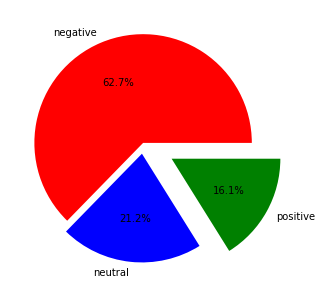

In [46]:
sentiment = df['airline_sentiment'].value_counts()
colors = ['red', 'blue', 'green']
explode = (0, 0.1, 0.3)

plt.figure(figsize=(5,5))
plt.pie(sentiment, labels=sentiment.index, autopct='%1.1f%%',colors=colors,explode=explode)
plt.show

Dibawah ini merupakan alasan negative dari pelanggan. Dapat diketahui bahwa yang paling banyak adalah mengenai permasalahan pada Customer Service. Untuk itu seharusnya pihak airline lebih meningkatkan pelayanana customer servicenya. Contohnya siaga 24jam untuk menjawab pertanyaan pelanggan, atau mungkin dapat menyediakan bot sosial media sehingga tidak perlu ada pekerja yang bekerja larut malam akan tetapi pertanyaan pelanggan tetap dapat terjawab.

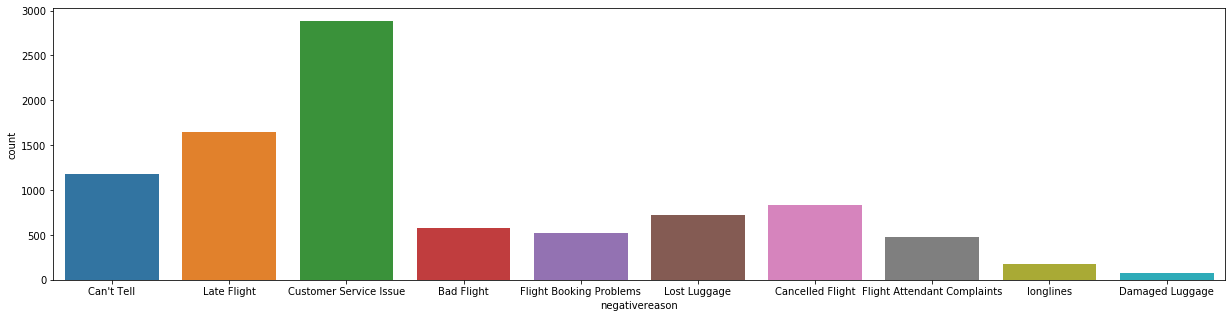

In [63]:
plt.figure(figsize=(21,5))
sns.countplot(df['negativereason'])

Pada pie chart dibawah ini menampilkan sentimen dari airline kelas gold. Dapat terlihat bawah sentiment negative lebih banyak dibandingkan sentiment lainnya hingga mencapai 80%. Sebuah airlines seharusnya meningkatkan kualitas pelayanan mereka untuk penumpang kelas gold ini agar tidak terjadi ketidakpuasan dari pelanggan.

<function matplotlib.pyplot.show>

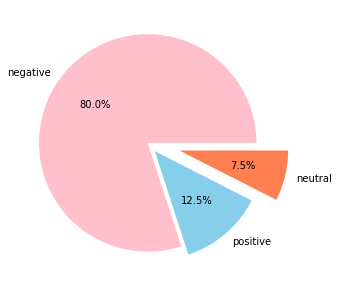

In [47]:
sentiment_gold = df['airline_sentiment_gold'].value_counts()
colors = ['pink', 'skyblue', 'coral']
explode = (0, 0.1, 0.3)

plt.figure(figsize=(5,5))
plt.pie(sentiment_gold, labels=sentiment_gold.index, autopct='%1.1f%%',colors=colors,explode=explode)
plt.show

Bar chart dibawah ini merupakan alasan diberikannya negative sentiment pada airline kelas gold. Dapat diketahui bahwa yang paling banyak dikomentari adalah permasalahan customer service. Pihak airline seharusnya memberikan pelayanan lebih baik untuk pelanggan kelas gold, contohnya dengan menjadi customer service yang proaktif kepada pelanggannya seperti mengingatkan *flight schedule*

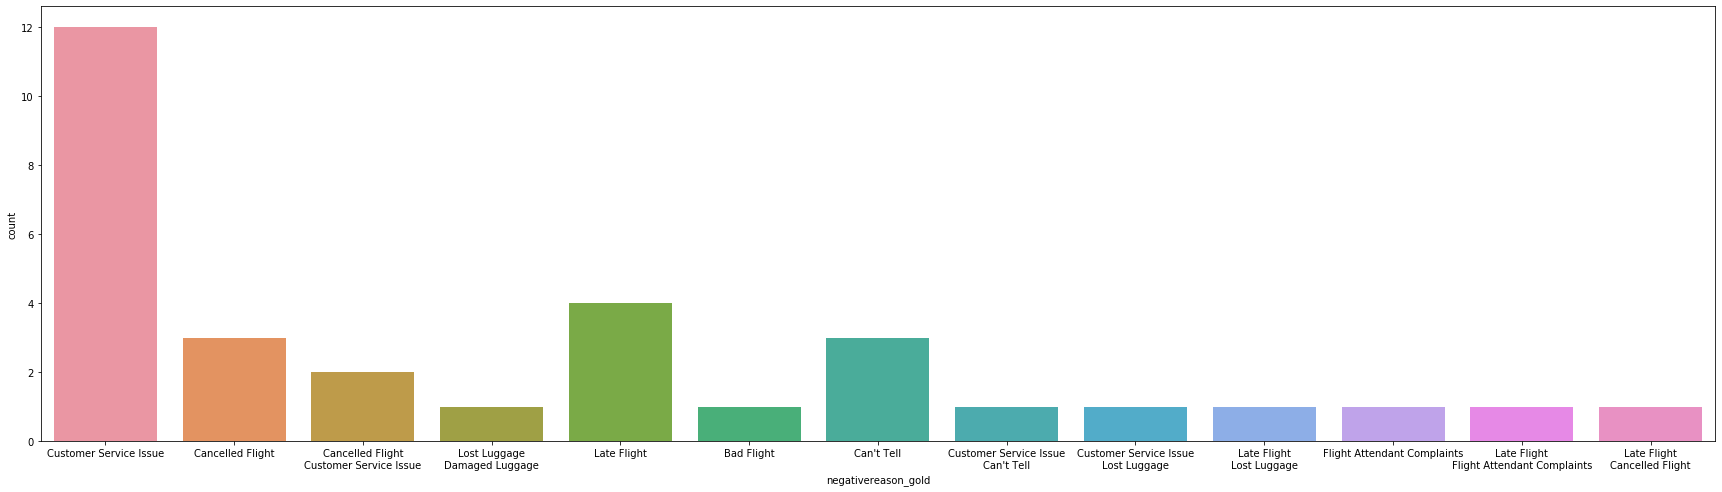

In [64]:
plt.figure(figsize=(30,8))
sns.countplot(df['negativereason_gold'])

### 4.2 Bar Chart

Pada bar chart dibawah ini dapat diketahui bahwa United airline merupakan airline yang paling banyak dibawah di twitter.

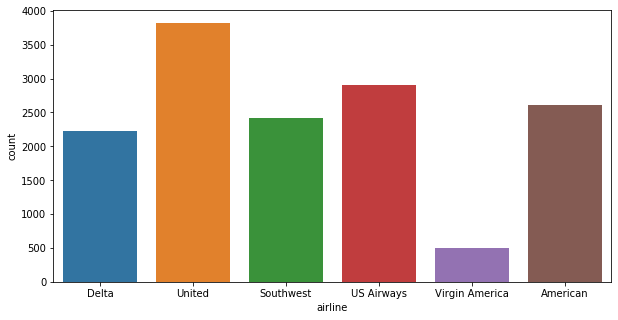

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df['airline'])

Code dibawah ini digunakan untuk mengetahui lokasi yang paling banyak dimana pengguna tersebut memberikan tanggapan mereka melalui twitter

In [33]:
df['tweet_location'].mode()

0    Boston, MA
dtype: object

Code dibawah ini digunakan untuk mengetahui timezone yang paling banyak digunakan oleh pengguna saat mereka mengirimkan *tweet* 

In [34]:
df['user_timezone'].mode()

0    Eastern Time (US & Canada)
dtype: object

Bar plot dibawah ini digunakan untuk melihat airline mana yang memiliki sentiment positif. Dapat diketahui bahwa ternyata soutwest airlines merupakan airline yang paling banyak mendapatkan sentimen positif.

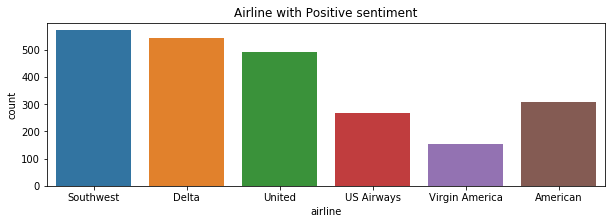

In [56]:
result = df[df.airline_sentiment=='positive']
positive = result[['airline_sentiment','airline']]
plt.figure(figsize=(10,3))
plt.title('Airline with Positive sentiment')
sns.countplot(positive['airline'])

Bar plot dibawah ini untuk mengetahui alasan negatif yang dibagikan pengguna mengenai soutwest airlines. Walaupun maskapai tersebut paling banyak mendapatkan sentimen positif, tapi mereka tidak bisa berpuas hati karena masih ada sentimen negatif yang diberikan kepada maskapai. Alasan yang paling banyak dikomentari oleh pelanggan adalah mengenai permasalahan customer service. Sehingga mereka harus meningkatkan layanan mengenai customer service untuk lebih baik lagi.

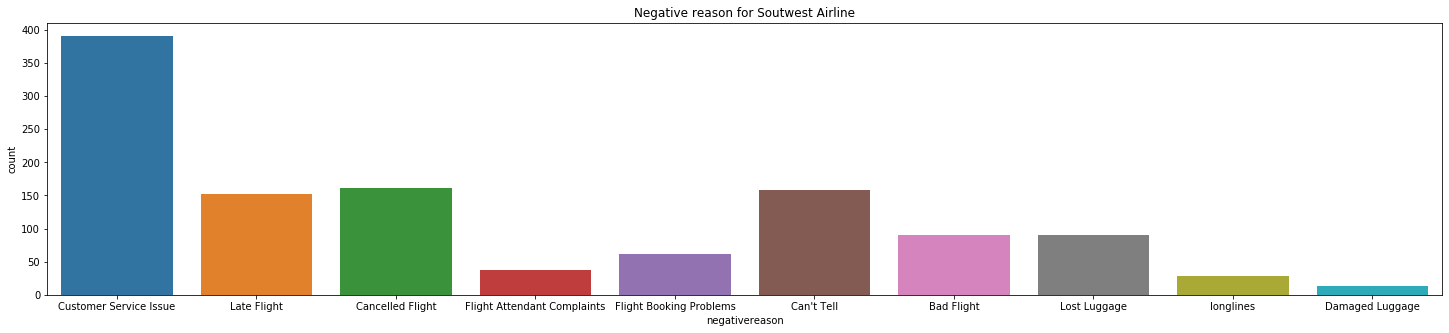

In [54]:
airline = df[df.airline=='Southwest']
negreason = airline[['airline','negativereason']]
plt.figure(figsize=(25,5))
plt.title('Negative reason for Soutwest Airline')
sns.countplot(negreason['negativereason'])

Bar plot dibawah ini digunakan untuk melihat airlines yang paling banyak mendapatkan sentimen netral.

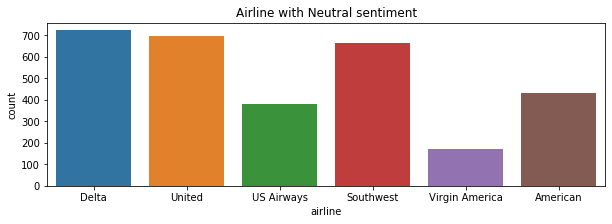

In [58]:
result = df[df.airline_sentiment=='neutral']
neutral = result[['airline_sentiment','airline']]
plt.figure(figsize=(10,3))
plt.title('Airline with Neutral sentiment')
sns.countplot(neutral['airline'])

Bar plot dibawah ini digunakan untuk melihat airlines yang paling banyak mendapatkan sentimen negatif. Dapat diketahui bahwa maskapai yang paling banyak mendapatkan sentimen negatif adalah United airline.

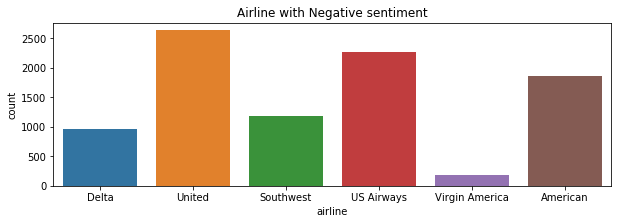

In [60]:
result2 = df[df.airline_sentiment=='negative']
negative = result2[['airline_sentiment','airline']]
plt.figure(figsize=(10,3))
plt.title('Airline with Negative sentiment')
sns.countplot(negative['airline'])

Karena United airline paling banyak mendapatkan sentimen negatif, maka diberikan bar plot dibawah ini untuk mengetahui alasan paling banyak dari pelanggan yang memberikan sentimen negatif. Pada bar plot dibawah ini diketahui bahwa United airline mengalami *delay* penerbangan yang sering sehingga pelanggan merasa tidak puas. Oleh karena itu United airline perlu merubah sistem penerbangan mereka. Maskapai tersebut harus mencari tahu terlebih dahulu mengapa bisa terjadi keterlambatan, setelah itu segera diselesaikan agar tidak terjadi keterlambatan lagi. 

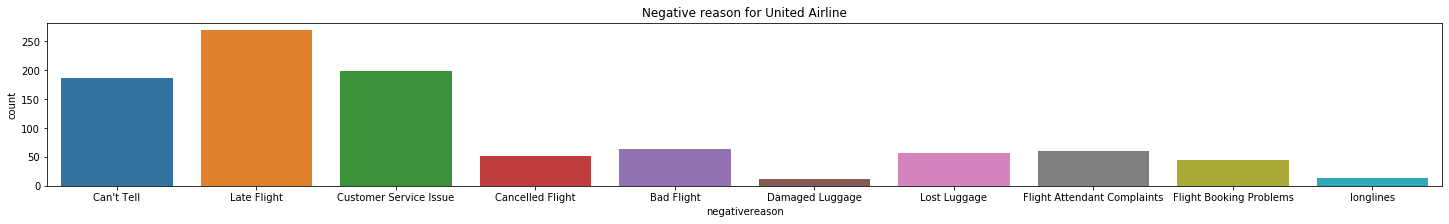

In [61]:
airline = df[df.airline=='United']
negreason = a[['negativereason','airline']]
plt.figure(figsize=(25,3))
plt.title('Negative reason for United Airline')
sns.countplot(negreason['negativereason'])

# Section D : Wordcloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
desc = "".join(dataframe.text.values)

In [45]:
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

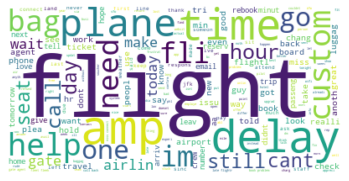

In [46]:
create_word_cloud(desc)

# Conclusion

Sentimen analisis pada kasus ini digunakan untuk mengetahui respon atau review dari pengguna mengenai beberapa maskapai. Dengan adanya sentimen analisis maka maskapai dapat membenahi sistem, fasilitas, pelayanan, dan lainnya untuk meningkatkan kepuasan pengguna, sehingga tidak akan ada lagi sentimen negatif mengenai maskapai tersebut. Selain itu pada kasus ini juga terdapat word cloud yang merupakan representasi visual dari data teks, biasanya digunakan untuk menggambarkan metadata keywords (tags) pada sebuah website/situs, untuk memvisualisasikan suatu bentuk teks secara bebas. Pada kasus ini dapat diketahui bahwa kata yang paling banyak digunakan oleh pengguna adalah kata "FLIGHT".